# New Section

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Packages Required

In [40]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# scaling
from sklearn.preprocessing import RobustScaler
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [41]:
data = pd.read_csv('/content/drive/MyDrive/MicrosoftML/heart attack/Final/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
data.duplicated().sum()

1

In [45]:
data.drop_duplicates(inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [47]:
data.value_counts('slp')

,count
slp,
2,141
1,140
0,21


In [48]:

# define the columns to be encoded and scaled
neumerical_data = ['age', 'trtbps', 'chol',  'thalachh', 'oldpeak'  ]
caterogrical_data = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall','slp' ]


# creating a copy of df
data1 = data

In [49]:
# encoding the categorical columns
data1 = pd.get_dummies(data1, columns = caterogrical_data)

# defining the features and target
X = data1.drop(['output'],axis=1)
y = data1[['output']]

#instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[neumerical_data] = scaler.fit_transform(X[neumerical_data])
print("The first 5 rows of X are")
X.head()


The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2
0,0.576923,0.75,-0.117647,-0.076336,0.9375,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,-1.423077,0.00,0.149020,1.053435,1.6875,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
2,-1.115385,0.00,-0.572549,0.595420,0.3750,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,0.038462,-0.50,-0.070588,0.778626,0.0000,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,0.115385,-0.50,1.780392,0.320611,-0.1250,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True


In [50]:
data1.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exng_0', 'exng_1', 'caa_0', 'caa_1', 'caa_2',
       'caa_3', 'caa_4', 'thall_0', 'thall_1', 'thall_2', 'thall_3', 'slp_0',
       'slp_1', 'slp_2'],
      dtype='object')

In [51]:
data1.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exng_0', 'exng_1', 'caa_0', 'caa_1', 'caa_2',
       'caa_3', 'caa_4', 'thall_0', 'thall_1', 'thall_2', 'thall_3', 'slp_0',
       'slp_1', 'slp_2'],
      dtype='object')

model prepration

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ML models

Logisitc Regression

In [54]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[23  4]
 [ 4 30]]


Accuracy of Logistic Regression: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Random Forest

In [55]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Random Forest: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



EXtreme Gradient Boost

In [56]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[17 10]
 [ 1 33]]


Accuracy of Extreme Gradient Boost: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.77      0.97      0.86        34

    accuracy                           0.82        61
   macro avg       0.86      0.80      0.81        61
weighted avg       0.85      0.82      0.81        61



SVM

In [57]:
m7 = 'Support Vector Classifier'
# svc =  SVC(kernel='rbf', C=2)
svc =  SVC(kernel='linear', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[23  4]
 [ 5 29]]


Accuracy of Support Vector Classifier: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



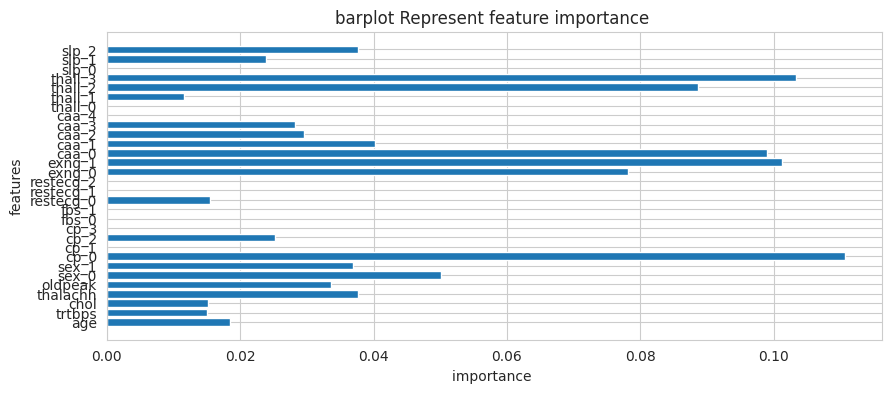

In [58]:
imp_feature = pd.DataFrame({'Feature': ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exng_0', 'exng_1', 'caa_0', 'caa_1', 'caa_2',
       'caa_3', 'caa_4', 'thall_0', 'thall_1', 'thall_2', 'thall_3', 'slp_0',
       'slp_1', 'slp_2'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

In [59]:
import plotly.express as px
importance = np.abs(model.coef_[0])
features = data1.drop(['output'],axis=1).columns
fig = px.bar(x=features, y=importance, title="Feature Importance")
fig.show()

In [60]:
importance

array([0.27646657, 0.38292306, 0.1628545 , 0.47399874, 0.46782838,
       0.43097742, 0.43097742, 0.43376797, 0.08907606, 0.3613699 ,
       0.3094072 , 0.02080536, 0.02080536, 0.01184567, 0.01672963,
       0.11180592, 0.11759117, 0.11759117, 0.76043153, 0.29964256,
       0.4732105 , 0.52343607, 0.29637674, 0.12886743, 0.14831303,
       0.3025831 , 0.35526528, 0.04262147, 0.31684389, 0.29494205])

In [61]:
xgb.feature_importances_.shape

(30,)

In [62]:
data1.shape

(302, 31)

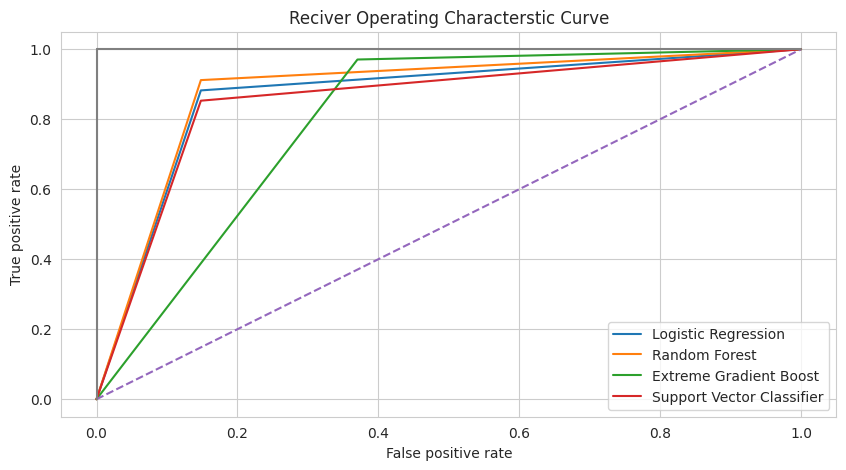

In [63]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [64]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Extreme Gradient Boost',
                    'Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,xgb_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.885246
1,Random Forest,88.524590
2,Extreme Gradient Boost,81.967213
3,Support Vector Machine,85.245902


Ensembling

In [65]:
scv=StackingCVClassifier(classifiers=[lr,rf,xgb,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:



confussion matrix
[[23  4]
 [ 5 29]]


Accuracy of StackingCVClassifier: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [66]:
import joblib

# Save the model
joblib.dump(rf, "ensembel_rf_model.pkl")

# Load the model
loaded_model = joblib.load("ensembel_rf_model.pkl")

In [67]:
scv_predicted = loaded_model.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of StackingCVClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [68]:
data1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2
0,63,145,233,150,2.3,1,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,37,130,250,187,3.5,1,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
2,41,130,204,172,1.4,1,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
3,56,120,236,178,0.8,1,False,True,False,True,...,False,False,False,False,False,True,False,False,False,True
4,57,120,354,163,0.6,1,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample DataFrame
data = {
    'age': [25, 30, 35, 40, 45],
    'gender': ['M', 'F', 'M', 'F', 'M'],
    'cp': [1, 0, 1, 0, 1],
    'target': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Splitting the data into train and test sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create dummy variables for the training data
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Create dummy variables for the test data
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the columns of the test set to match the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print("Encoded Training Data:")
print(X_train_encoded)

print("\nEncoded Test Data:")
print(X_test_encoded)



Encoded Training Data:
   age  cp  gender_M
4   45   1      True
2   35   1      True
0   25   1      True
3   40   0     False

Encoded Test Data:
   age  cp  gender_M
1   30   0         0
